# Statistical Learning

Given: Data

- $X$ / input / features
- $y$ / output / target

We assume that there is some function $f$ such that

$$y=f(X)+\varepsilon$$

Note:

1. X is often a vector
1. $\varepsilon$ is the "error term" and represents both known and unknown sources of noise

$X$ and $y$ are bothh known. We seek $f$.

This can be trivial. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

In [2]:
x1 = (-1,3)
x2 = (3,5)

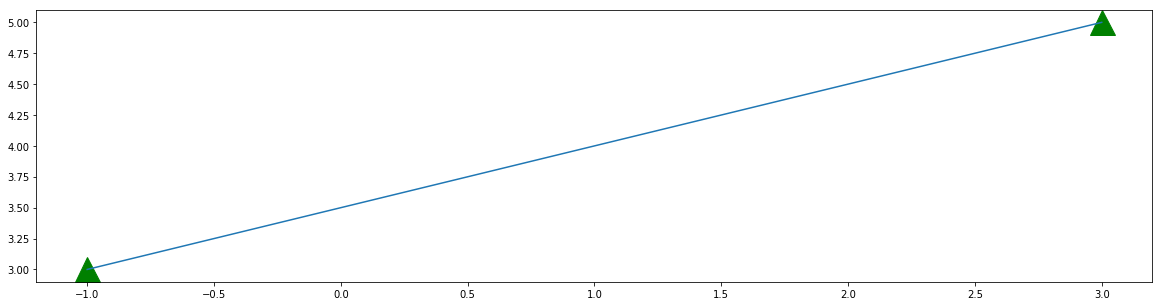

In [3]:
fig, ax = plt.subplots(1,1,figsize=(20,5))

ax.plot(x1[0], x1[1], 'g^', ms=25)
ax.plot(x2[0], x2[1], 'g^', ms=25)
ax.plot(x1, x2)

But can quickly become more complicated.

In [4]:
x3 = (0,3.25)
x4 = (1,4)
x5 = (2,4.75)

points = [x1,x2,x3,x4,x5]

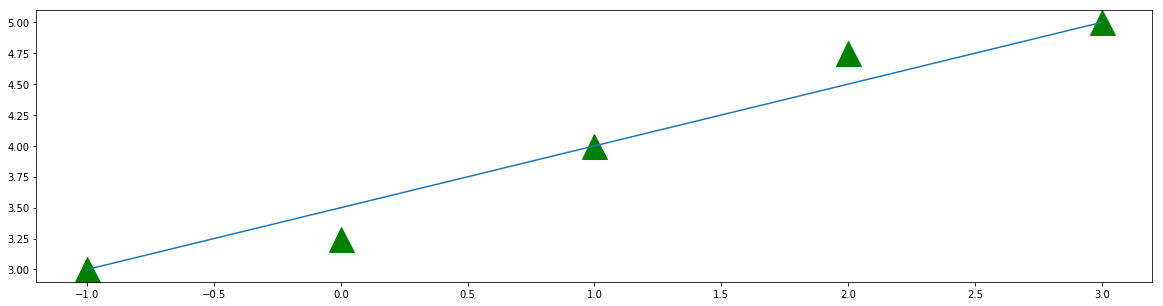

In [5]:
fig, ax = plt.subplots(1,1,figsize=(20,5))

for point in points:
    ax.plot(*point, 'g^', ms=25)
ax.plot(x1, x2)

The line here does not fit perfectly. 

We seek "the best" $f$, called $\widehat{f}$ or "eff hat".

We will quantify what "best" mean in terms of error. 

For $\widehat{y} = \widehat{f}(X)$, we consider the error over our data

$$\text{E}\left[(y-\widehat{y})^2\right] = \left[f(X)-\widehat{f}(X)\right]^2 + \text{Var}(\varepsilon)$$

## Why would we want to estimate $f$?

1. Prediction - Given some new value for $X$, what would we expect $y$ to be?
2. Inference
   - Which features ($X_1, X_2, \dots$) are associated with the target $y$?
   - What is the relationship between the target $y$ and each feature ($X_1, X_2, \dots$)?
   - Can the relationship between the target $y$ and each feature be adequately summarized using a linear equation, or is the relationship more complicated?

In [6]:
Advertising = pd.read_csv('data/Advertising.csv', index_col=0)

### Inference on Advertising Data

Here we create a series of **linear models** to help us make inferences.

> linear models allow for relatively simple and inter- pretable inference, but may not yield as accurate predictions as some other approaches

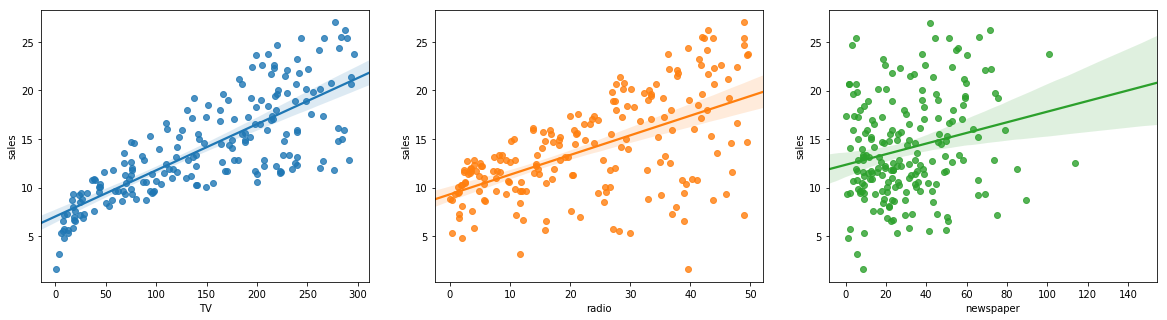

In [7]:
fig, ax = plt.subplots(1,3,figsize=(20,5))
for i, feature in enumerate(['TV', 'radio', 'newspaper']):
    sns.regplot(Advertising[feature], Advertising.sales, ax=ax[i])

- Which media contribute to sales?
- Which media generate the biggest boost in sales?
- How much increase in sales is associated with a given increase in TV advertising?

## Parametric versus Non-Parametric

### Parametric Models

1. We make an assumption about the functional form, or shape, of $f$.
2. After a model has been selected, we need a procedure that uses the training data to fit or train the model. 

The linear model is an important example of a parametric model. We consider 

$$\widehat{f}(X) = \beta_0 + \beta_1X_1 + \beta_2X_2 + \dots + \beta_pX_p$$

- A linear model is specified in terms of $p + 1$ parameters $\beta_0, \beta_1, \dots, \beta_p$
- We estimate the parameters by fitting the model to training data.
- Although it is almost never correct, a linear model often serves as a good and interpretable approximation to the unknown true function $f(X)$.
- the most common method to fitting linear models is the ordinary least squares (OLS) method

### Non-Parametric Models

- Non-parametric methods do not make explicit assumptions about the functional form of $f$. 
- Any parametric approach brings with it the possibility that the functional form used to estimate $f$ is very different from the true $f$, in which case the resulting model will not fit the data well. 
- In contrast, non-parametric approaches completely avoid this danger, since essentially no assumption about the form of $f$ is made. 
- But non-parametric approaches do suffer from a major disadvantage: since they do not reduce the problem of estimating $f$ to a small number of parameters, a very large number of observations (far more than is typically needed for a parametric approach) is required in order to obtain an accurate estimate for $f$ ... **THE CURSE OF DIMENSIONALITY**.

K Nearest Neighbors is an important example of a non-parametric model.

## Tradeoffs

### The Trade-Off Between Overfitting and Underfitting

A potential disadvantage of a parametric approach is that the model we choose will usually not match the true unknown form of $f$. 

If the chosen model is too far from the true $f$, then our estimate will be poor. 

We can try to address this problem by choosing flexible models that can fit many different possible functional forms for $f$. 

In [8]:
xx = np.linspace(-2,2,20)
yy = xx**3 + 2*np.random.random(20) + 100

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
lr = LinearRegression()
lr.fit(xx.reshape(-1, 1), yy)
lr.coef_, lr.intercept_

(array([ 2.605287]), 101.08428117812336)

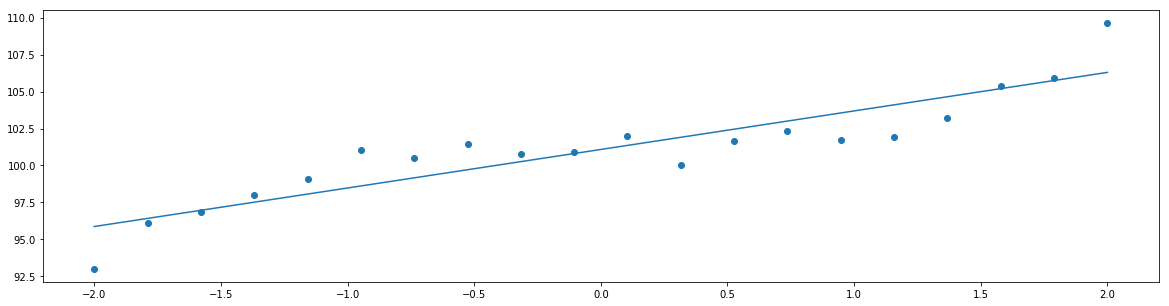

In [11]:
fig, ax = plt.subplots(1,1,figsize=(20,5))
ax.scatter(xx, yy)
ax.plot(xx, xx*lr.coef_ + lr.intercept_)

In [12]:
from lib.lec_3_helper import fit_and_plot_poly_to_degree

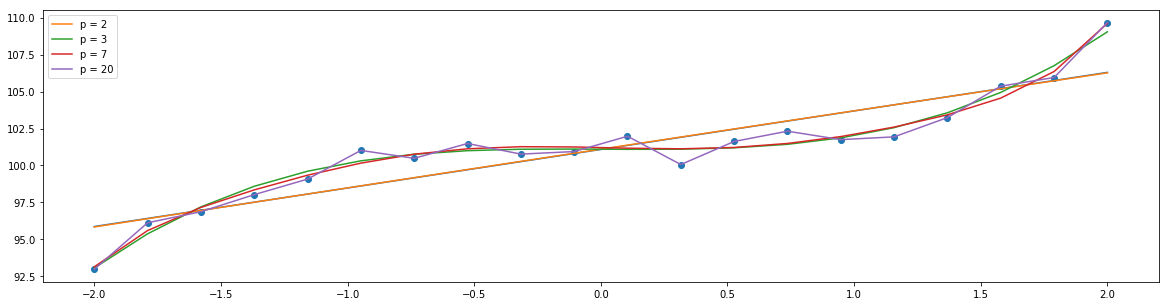

In [13]:
fig, ax = plt.subplots(1,1,figsize=(20,5))
ax.scatter(xx, yy)
ax.plot(xx, xx*lr.coef_ + lr.intercept_)
for i in [2,3,7,20]:
    fit_and_plot_poly_to_degree(xx, yy, i, ax)
plt.legend()

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
lr = LinearRegression()
lr.fit(Advertising[['TV']], Advertising.sales)
lr.coef_, lr.intercept_

(array([ 0.04753664]), 7.0325935491276947)

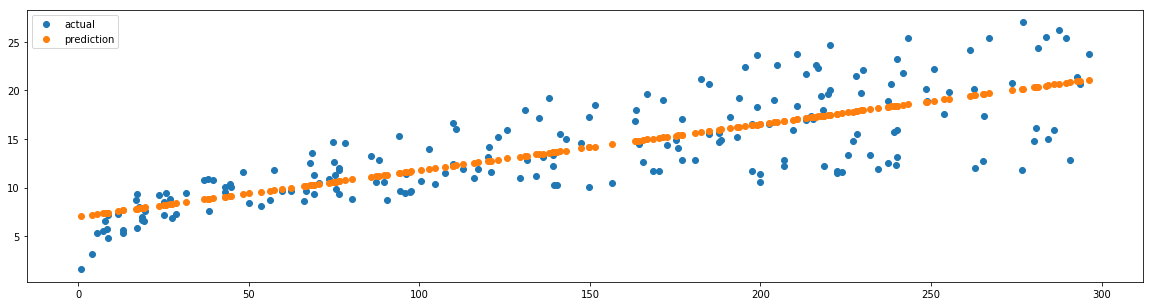

In [16]:
fig, ax = plt.subplots(1,1,figsize=(20,5))
ax.scatter(Advertising.TV, Advertising.sales, label='actual')
ax.scatter(Advertising.TV, lr.predict(Advertising[['TV']]), label='prediction')
plt.legend()

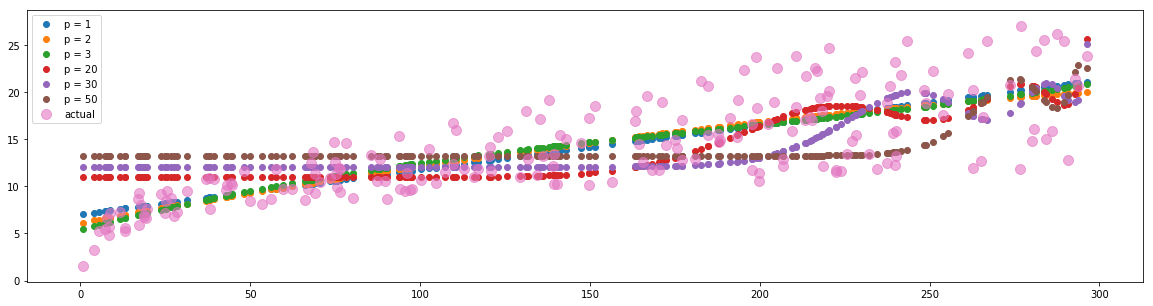

In [17]:
fig, ax = plt.subplots(1,1,figsize=(20,5))
for i in [1,2,3,20,30,50]:
    fit_and_plot_poly_to_degree(Advertising.TV, Advertising.sales, i, ax, scatter=True)
ax.scatter(Advertising.TV, Advertising.sales, label='actual', s=100, alpha=0.6)
plt.legend()

But in general, fitting a more flexible model requires estimating a greater number of parameters. 

These more complex models can lead to a phenomenon known as **overfitting** the data, which essentially means they follow the errors, or noise, too closely. 

We can generalize this in terms of model flexibility. In general, less flexible models may overfit, whereas more flexible models may overfit. 

### The Trade-Off Between Prediction Accuracy and Model Interpretability

We can also think about flexibility and accuracy in terms of our ability to interpret models.

![](img/Chapter2/2.7.pdf)

Models on the right can often be "black box" models that are difficult to interpret. Their increased flexibility may make them stronger at making accuracte predictions.

Models on the left will be much more simple, but they may also be less accurate.

## Statistical Learning Domains

1. Supervised Learning
2. Unsupervised Learning
3. Regression
4. Classification
5. Cluster Analysis

Why is it necessary to introduce so many different statistical learning approaches, rather than just a single best method?

**TANSTAAFL**